In [1]:
%matplotlib inline
import argparse
import csv
import logging
import os
import random
import sys
import pickle
import time
import numpy as np
from termcolor import colored
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from bert_util import *

In [2]:
mnli_processor = MnliProcessor()
hans_processor = HansProcessor()
train_examples = mnli_processor.get_train_examples('data/', 10000)
test_examples = hans_processor.get_test_examples('data/')

In [171]:
interested_test_idx = 7

for te in test_examples:
    if te.guid == interested_test_idx:
        print(te.guid)
        print(colored(te.text_a, "blue"), colored(te.text_b, "red"), te.label)
        break

7
The athlete by the doctors encouraged the senator . The athlete encouraged the senator . entailment


In [172]:
test_tok_sal_list, train_tok_sal_lists, test_pred_status = pickle.load(open("from_aws/NLI_influence_output_bert_e3/saliency_test_" + str(interested_test_idx) + ".pkl", "rb"))

In [173]:
test_pred_status

'correct'

In [174]:
top_sal_ix = [_ix for _ix, _ in sorted(enumerate(test_tok_sal_list), key=lambda x: -x[1][1])][:3]
for ix, (tok, sal) in enumerate(test_tok_sal_list):
    if ix in top_sal_ix:
        print(colored(tok + '\t' + str(sal), "green"))
    else:
        print(tok + '\t' + str(sal))

[CLS]	0.004317282
the	-0.007485319
athlete	-0.14760923
by	-0.049165454
the	-0.050391756
doctors	-0.14886299
encouraged	-0.088029
the	-0.032777905
senator	-0.055137962
.	-0.01177289
[SEP]	0.003715336
the	0.01097851
athlete	-0.04906088
encouraged	0.08856703
the	-0.009075683
senator	-0.18473382
.	-0.022565214
[SEP]	0.035753675


In [175]:
influences = pickle.load(open("from_aws/NLI_influence_output_bert_e3/influences_test_" + str(interested_test_idx) + ".pkl", "rb"))
influences = stats.zscore(influences)

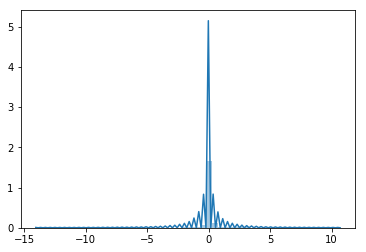

In [176]:
sns.distplot(influences)

In [177]:
order_of_interest = "max"
label_of_interest = "both"
num_of_interest = 20

train_idx_sorted = list(np.argsort(influences))
if order_of_interest == "max":
    train_idx_sorted.reverse()
if label_of_interest == "both":
    valid_labels = ["entailment", "non-entailment"]
else:
    valid_labels = [label_of_interest]

cnt = 0
for idx in train_idx_sorted:
    te = train_examples[idx]
    if te.label in valid_labels:
        print(colored(te.text_a, "blue"), colored(te.text_b, "red"), te.label)
        print(influences[idx])
#         top_sal_ix = [_ix for _ix, _ in sorted(enumerate(train_tok_sal_lists[idx]), key=lambda x: -x[1][1])][:3]
#         for ix, (tok, sal) in enumerate(train_tok_sal_lists[idx]):
#             if ix in top_sal_ix:
#                 print(colored(tok + '\t' + str(sal), "green"))
#             else:
#                 print(tok + '\t' + str(sal))
        print()
        cnt += 1
    if cnt >= num_of_interest:
        break

One of the drawings on view at MoMA is a diagram of the races, with the Jews identified as circumscised [ sic ] cut off from Earth. Jews think of drawings on the MoMA as a diagram of the races teaching circumcision.  entailment
10.675267619891791

Two pillars surviving from the Greek Temple of Apollo stand like a gateway, but the Spanish era has given it a charming 17th-century ambience of Baroque houses with iron balconies supported by floral carvings and an occasional stone nymph. It's comprised of parts of the Greek Temple of Apollo and Spanish Baroque houses. entailment
9.935398536642214

because you're having fun Because you're having fun entailment
9.227490645253376

9. INVERSE PRICE CAPS 9 Inward caps on price.  entailment
9.15203224663952

I don't know if I was in heaven or hell, said Lillian Carter, the president's mother, after a visit. The president's mother visited. entailment
9.069184865280848

Do it now, think 'bout it later. Don't think about it now, just do it. entailme

In [168]:
order_of_interest = "min"
label_of_interest = "both"
num_of_interest = 20

train_idx_sorted = list(np.argsort(influences))
if order_of_interest == "max":
    train_idx_sorted.reverse()
if label_of_interest == "both":
    valid_labels = ["entailment", "non-entailment"]
else:
    valid_labels = [label_of_interest]

cnt = 0
for idx in train_idx_sorted:
    te = train_examples[idx]
    if te.label in valid_labels:
        print(colored(te.text_a, "blue"), colored(te.text_b, "red"), te.label)
        print(influences[idx])
#         top_sal_ix = [_ix for _ix, _ in sorted(enumerate(train_tok_sal_lists[idx]), key=lambda x: -x[1][1])][:3]
#         for ix, (tok, sal) in enumerate(train_tok_sal_lists[idx]):
#             if ix in top_sal_ix:
#                 print(colored(tok + '\t' + str(sal), "green"))
#             else:
#                 print(tok + '\t' + str(sal))
        print()
        cnt += 1
    if cnt >= num_of_interest:
        break

H'm, yes, that might be, said John.  Yes, that might be the case, said John. non-entailment
-15.835316861365476

This coalition of public and private entities undertakes initiatives aimed at raising public awareness about personal finance and retirement planning. Personal finance and retirement planning are initiatives aimed at raising public awareness. non-entailment
-14.574376762573735

If you've installed Internet Explorer 4.0, the new version of Microsoft's browser, you might like to take a peek at our new Table of Contents, designed especially to take advantage of the advances in Internet Explorer 4.0. With Internet Explorer 4.0, you can take advantage of our new Table of Contents for Internet Explorer 4.0 users. non-entailment
-14.305925970899958

Their applicability to case study evaluations outside of settings such as GAO is being explored. They are exploring the applicability to case study evaluations inside the settings. non-entailment
-14.163630165532917

Et  In an interview